<a href="https://colab.research.google.com/github/DionesGouvea/Michigan/blob/main/Applied%20Machine%20Learning%20in%20Python/Week%202/Modulo_2_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Modulo_2

In [2]:
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

np.set_printoptions(precision=2)


fruits = pd.read_table('/content/fruit_data_with_colors.txt')


feature_names_fruits = ['height', 'width', 'mass', 'color_score']
X_fruits = fruits[feature_names_fruits] #features para treino 
y_fruits = fruits['fruit_label'] #Target 
target_names_fruits = ['apple', 'mandarin', 'orange', 'lemon']

X_fruits_2d = fruits[['height', 'width']]
y_fruits_2d = fruits['fruit_label']

#divididno em treino e teste 
X_train, X_test, y_train, y_test = train_test_split(X_fruits, y_fruits, random_state=0)

#colocando as features na mesma escala entre 0 e 1
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
# devemos aplicar o escalonamento ao conjunto de teste que calculamos para o conjunto de treinamento
X_test_scaled = scaler.transform(X_test)


knn = KNeighborsClassifier(n_neighbors = 5)# instanciando o modelo knn para 5 vizinhos 
knn.fit(X_train_scaled, y_train) #treinando o modelo 
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train_scaled, y_train))) #score em treinamento 
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test_scaled, y_test))) #score em teste 

#Exemplo de predict para uma fruta 
example_fruit = [[5.5, 2.2, 10, 0.70]]
example_fruit_scaled = scaler.transform(example_fruit)
print('Predicted fruit type for ', example_fruit, ' is ', 
          target_names_fruits[knn.predict(example_fruit_scaled)[0]-1])

Accuracy of K-NN classifier on training set: 0.95
Accuracy of K-NN classifier on test set: 1.00
Predicted fruit type for  [[5.5, 2.2, 10, 0.7]]  is  mandarin


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


## Funções 

In [3]:
def load_crime_dataset():
    # Communities and Crime dataset for regression
    # https://archive.ics.uci.edu/ml/datasets/Communities+and+Crime+Unnormalized

    crime = pd.read_table('/content/CommViolPredUnnormalizedData.txt', sep=',', na_values='?')
    # remove features with poor coverage or lower relevance, and keep ViolentCrimesPerPop target column
    columns_to_keep = [5, 6] + list(range(11,26)) + list(range(32, 103)) + [145]  
    crime = crime.iloc[:,columns_to_keep].dropna()

    X_crime = crime.iloc[:,range(0,88)]
    y_crime = crime['ViolentCrimesPerPop']

    return (X_crime, y_crime)



## Exemplos de Regressão e classificação 

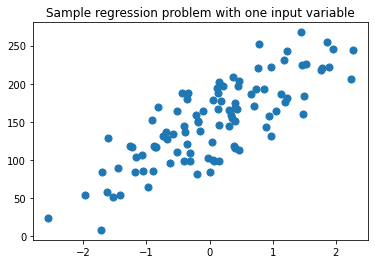

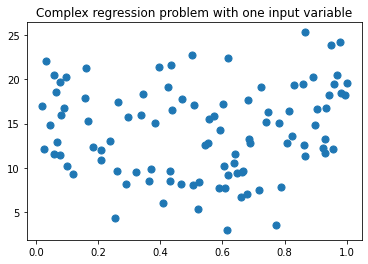

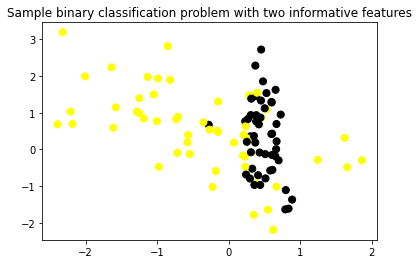

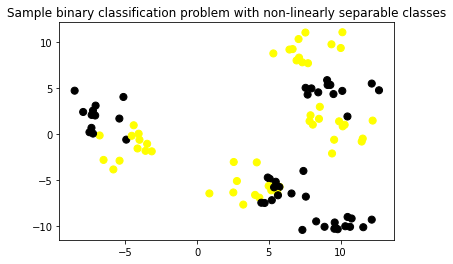

In [4]:
from sklearn.datasets import make_classification, make_blobs
from matplotlib.colors import ListedColormap


cmap_bold = ListedColormap(['#FFFF00', '#00FF00', '#0000FF','#000000'])



# conjunto de dados sintético para regressão simples
from sklearn.datasets import make_regression
plt.figure()
plt.title('Sample regression problem with one input variable')
X_R1, y_R1 = make_regression(n_samples = 100, n_features=1,
                            n_informative=1, bias = 150.0,
                            noise = 30, random_state=0)
plt.scatter(X_R1, y_R1, marker= 'o', s=50)
plt.show()


#conjunto de dados sinteticos para uma regressão mais complexa 
from sklearn.datasets import make_friedman1
plt.figure()
plt.title('Complex regression problem with one input variable')
X_F1, y_F1 = make_friedman1(n_samples = 100,
                           n_features = 7, random_state=0)

plt.scatter(X_F1[:, 2], y_F1, marker= 'o', s=50)
plt.show()

# conjunto de dados para uma classificação binaria  
plt.figure()
plt.title('Sample binary classification problem with two informative features')
X_C2, y_C2 = make_classification(n_samples = 100, n_features=2,
                                n_redundant=0, n_informative=2,
                                n_clusters_per_class=1, flip_y = 0.1,
                                class_sep = 0.5, random_state=0)
plt.scatter(X_C2[:, 0], X_C2[:, 1], c=y_C2,
           marker= 'o', s=50, cmap=cmap_bold)
plt.show()


# conjunto de dados sintético mais difícil para classificação (binário)
# com classes que não são linearmente separáveis
X_D2, y_D2 = make_blobs(n_samples = 100, n_features = 2, centers = 8,
                       cluster_std = 1.3, random_state = 4)
y_D2 = y_D2 % 2
plt.figure()
plt.title('Sample binary classification problem with non-linearly separable classes')
plt.scatter(X_D2[:,0], X_D2[:,1], c=y_D2,
           marker= 'o', s=50, cmap=cmap_bold)
plt.show()





## Carregando os datasets
### e definindo X e y

In [6]:
from sklearn.datasets import load_breast_cancer

# Breast cancer dataset for classification
cancer = load_breast_cancer()
(X_cancer, y_cancer) = load_breast_cancer(return_X_y = True)


# Communities and Crime dataset
(X_crime, y_crime) = load_crime_dataset()

## K-Nearest Neighbors

### Classification

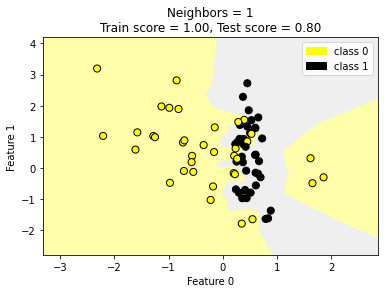

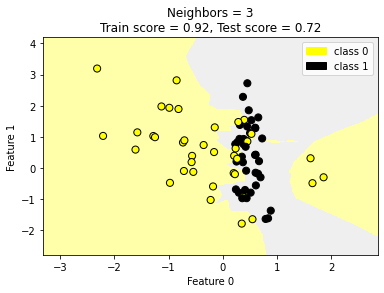

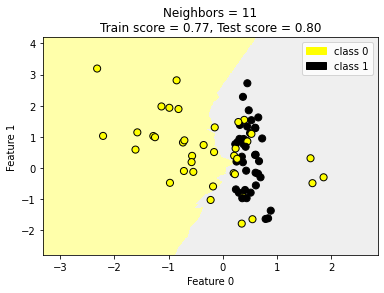

In [13]:
from adspy_shared_utilities import plot_two_class_knn

X_train, X_test, y_train, y_test = train_test_split(X_C2, y_C2,
                                                   random_state=0)

plot_two_class_knn(X_train, y_train, 1, 'uniform', X_test, y_test)
plot_two_class_knn(X_train, y_train, 3, 'uniform', X_test, y_test)
plot_two_class_knn(X_train, y_train, 11, 'uniform', X_test, y_test)

**Knn = 1**

E possivel perceber que o modelo ficou sobreajustado tentando pegar todos os pontos, nesse caso ele performa bem treino porem quando recebe dados novos (teste) ele não consegue capturar todos os pontos. 

**Knn = 3**

O mesmo caso do Knn = 1 o modelo ainda esta sobreajustado tentando capturar todos os pontos na fase de treino 

**knn = 11**

o modelo ja tende traçar uma divisão no espaço dividindo os dois grupos, por mais que alguns pontos não sejam capturados este modelo tende a perfomar melhor com dados novos. 

### Regression

In [14]:
from sklearn.neighbors import KNeighborsRegressor

X_train, X_test, y_train, y_test = train_test_split(X_R1, y_R1, random_state = 0)

knnreg = KNeighborsRegressor(n_neighbors = 5).fit(X_train, y_train)

print(knnreg.predict(X_test))
print('R-squared test score: {:.3f}'
     .format(knnreg.score(X_test, y_test)))

[231.71 148.36 150.59 150.59  72.15 166.51 141.91 235.57 208.26 102.1
 191.32 134.5  228.32 148.36 159.17 113.47 144.04 199.23 143.19 166.51
 231.71 208.26 128.02 123.14 141.91]
R-squared test score: 0.425


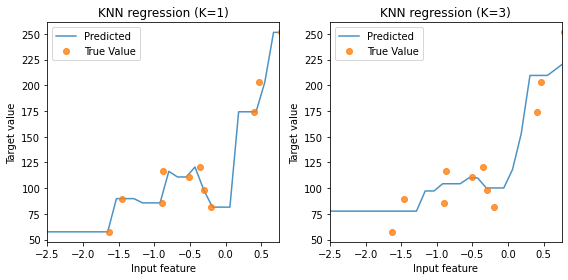

In [16]:
fig, subaxes = plt.subplots(1, 2, figsize=(8,4))
X_predict_input = np.linspace(-3, 3, 50).reshape(-1,1) #linspace de -3 a 3 com intervalo de 0.5
X_train, X_test, y_train, y_test = train_test_split(X_R1[0::5], y_R1[0::5], random_state = 0)

for thisaxis, K in zip(subaxes, [1, 3]):
    knnreg = KNeighborsRegressor(n_neighbors = K).fit(X_train, y_train)#treinando o modelo 
    y_predict_output = knnreg.predict(X_predict_input)# usando o linspace para o predict ter um local no espaço. 
    
    #plotando 
    thisaxis.set_xlim([-2.5, 0.75])
    thisaxis.plot(X_predict_input, y_predict_output, '-', markersize = 10,
                 label='Predicted', alpha=0.8)
    thisaxis.plot(X_train, y_train, 'o', label='True Value', alpha=0.8)
    thisaxis.set_xlabel('Input feature')
    thisaxis.set_ylabel('Target value')
    thisaxis.set_title('KNN regression (K={})'.format(K))
    thisaxis.legend()
plt.tight_layout()

**Knn = 1** 

O modelo esta sobreajustado, a reta esta passando ponto a ponto, o que ocasonaria em uma performace ruim com novos dados

**Knn = 3**

A nossa reta ao inves de passar ponto a ponto esta bem ajudatada acertando poucos pontos mas obtendo baixo erro no momento da previsão.  

## Regression Model - Aumentando a complexidade apartir do K 

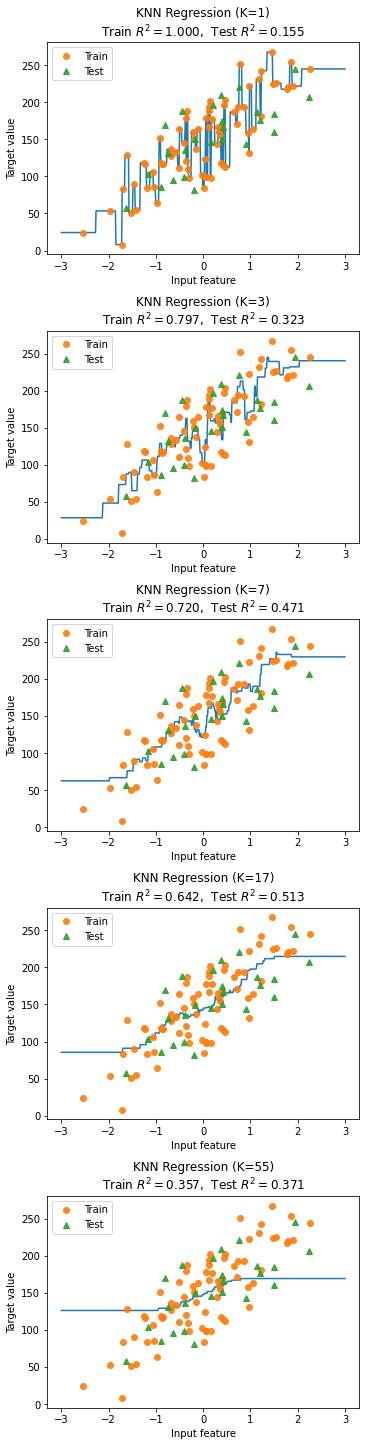

In [26]:
# plot k-NN regression on sample dataset for different values of K
fig, subaxes = plt.subplots(5, 1, figsize=(5,20))
X_predict_input = np.linspace(-3, 3, 500).reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X_R1, y_R1,
                                                   random_state = 0)

for thisaxis, K in zip(subaxes, [1, 3, 7, 17, 55]):
    knnreg = KNeighborsRegressor(n_neighbors = K).fit(X_train, y_train)
    y_predict_output = knnreg.predict(X_predict_input)
    train_score = knnreg.score(X_train, y_train)
    test_score = knnreg.score(X_test, y_test)

    #plot 
    thisaxis.plot(X_predict_input, y_predict_output)
    thisaxis.plot(X_train, y_train, 'o', alpha=0.9, label='Train')
    thisaxis.plot(X_test, y_test, '^', alpha=0.9, label='Test')
    thisaxis.set_xlabel('Input feature')
    thisaxis.set_ylabel('Target value')
    thisaxis.set_title('KNN Regression (K={})\n\
Train $R^2 = {:.3f}$,  Test $R^2 = {:.3f}$'
                      .format(K, train_score, test_score))
    thisaxis.legend()
    plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)


é possivel perceber que até certo ponto conforme aumentamos o valor de K a performance de treino diminui porem conseguimos obter um melhor resultado em test. Neste exemplo conseguimos obter o melhor resultado em teste com K = 17.